In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## Load data

In [7]:
manual_df = pd.read_csv("/Users/juhe/annie/analysis/fitbyeye_wcsim_0-999.txt", header=None, names=['evid', 'manual_fit'])
print("num events: " + str(len(manual_df)))
manual_df.head(5)

num events: 1290


,evid,manual_fit
0,p0_66,150.0
1,p1_24,210.0
2,p2_73,180.0
3,p3_22,270.0
4,p4_77,170.0


In [8]:
rnn_df = pd.read_csv("/Users/juhe/annie/analysis/Muon_vertex/fitbyeye_wcsim_0-999_RNN.txt", header=None, names=['evid','rnn_fit'])
print("num events: " + str(len(rnn_df)))
rnn_df.head(5)

num events: 1208


,evid,rnn_fit
0,p401_59,262.64066
1,p114_64,269.44006
2,p900_34,222.89459
3,p987_25,308.26767
4,p961_87,138.97578


## Merge dataframes

In [5]:
merged_df = pd.merge(manual_df, rnn_df, on='evid', how='outer')
merged_df

,evid,manual_fit,rnn_fit
0,p0_66,150.0,150.595430
1,p1_24,210.0,228.660520
2,p2_73,180.0,264.739470
3,p3_22,270.0,NaN
4,p4_77,170.0,176.074630
...,...,...,...
1286,p996_66,190.0,215.273280
1287,p997_84,220.0,238.728000
1288,p998_84,250.0,265.485080
1289,p999_77,200.0,241.574110


## Find difference btwn fits

In [10]:
merged_df['diff'] = merged_df['manual_fit'] - merged_df['rnn_fit']

In [11]:
merged_df

,evid,manual_fit,rnn_fit,diff
0,p0_66,150.0,150.595430,-0.59543
1,p1_24,210.0,228.660520,-18.66052
2,p2_73,180.0,264.739470,-84.73947
3,p3_22,270.0,NaN,NaN
4,p4_77,170.0,176.074630,-6.07463
...,...,...,...,...
1286,p996_66,190.0,215.273280,-25.27328
1287,p997_84,220.0,238.728000,-18.72800
1288,p998_84,250.0,265.485080,-15.48508
1289,p999_77,200.0,241.574110,-41.57411


## Histogram differences btwn fits

(array([  12.,   98.,    0.,    0.,    0.,    0.,    0.,    7.,   69.,
        1021.]), array([-1306.8991  , -1166.934738, -1026.970376,  -887.006014,
         -747.041652,  -607.07729 ,  -467.112928,  -327.148566,
         -187.184204,   -47.219842,    92.74452 ]), <a list of 10 Patch objects>)

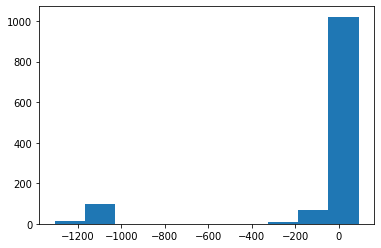

In [13]:
plt.hist(merged_df['diff'])

In [14]:
merged_df[merged_df['manual_fit'] < 0]

,evid,manual_fit,rnn_fit,diff
141,p108_34,-999.0,130.754030,-1129.754030
148,p112_49,-999.0,NaN,NaN
159,p121_63,-999.0,132.521130,-1131.521130
167,p126_50,-999.0,132.194230,-1131.194230
168,p126_92,-999.0,122.305084,-1121.305084
...,...,...,...,...
1252,p968_14,-999.0,131.142140,-1130.142140
1257,p971_4,-999.0,129.372180,-1128.372180
1258,p971_76,-999.0,138.337650,-1137.337650
1268,p979_52,-999.0,NaN,NaN
